HOMEWORK #2 CLASSIFICATION

Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns #data visualization
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, accuracy_score)
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import CategoricalNB as nb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#import warnings
import warnings
warnings.filterwarnings('ignore')


LOAD DATA

In [2]:
boston_data = pd.read_csv('Boston.csv')
#display columns
print(boston_data.columns)
#get the descriptive statistics for all data
boston_data.describe(include='all')
#drop unamed column
boston_data = boston_data.drop(['Unnamed: 0'], axis=1)
print(boston_data.head())

#get the mean for the medv (Median value of owner-occupied homes in $1000s)
mean_med = boston_data['medv'].mean()
print(mean_med)


#get the quantiles for the  medv column
quantile1 = boston_data['medv'].quantile(0.25)
quantile2 = boston_data['medv'].quantile(0.50)
quantile3= boston_data['medv'].quantile(0.75)


Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
22.532806324110677


1.Convert the medv variable to categorical (High and Low) using the mean as the cut-off. When medv is greater than the mean, change the value to High else, change to high else change to low

In [3]:
#converting medv variable to categorical values of high and low
boston_data['medv'] = boston_data['medv'].apply(lambda x : "high" if x >mean_med else "low")

print(boston_data.tail()) #geting the last five rows of medv_column
print(boston_data['medv'].value_counts()) #getting the number of highs and lows

        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

     lstat  medv  
501   9.67   low  
502   9.08   low  
503   5.64  high  
504   6.48   low  
505   7.88   low  
medv
low     297
high    209
Name: count, dtype: int64


#question 2.
Produce some numerical and graphical summaries of the dataset. Comment on the summaries. Are there any patterns?

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98     1  
1   9.14     0  
2   4.03     1  
3   2.94     1  
4   5.33     1  




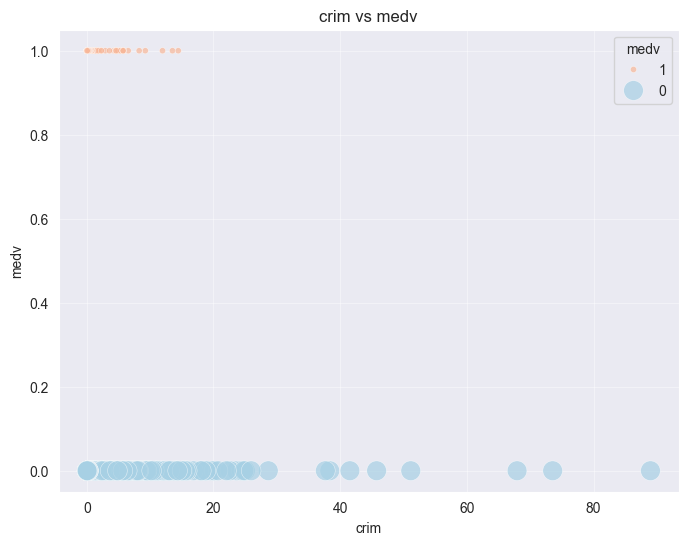

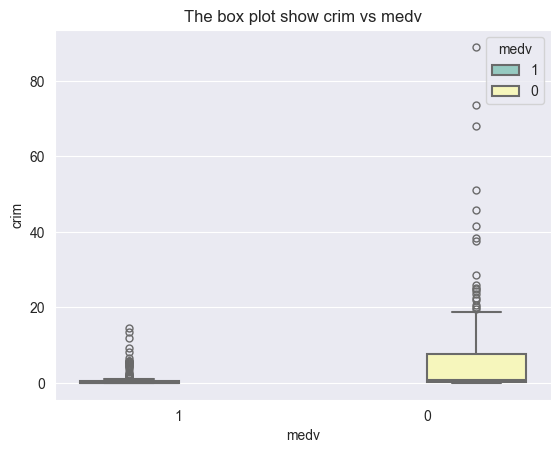

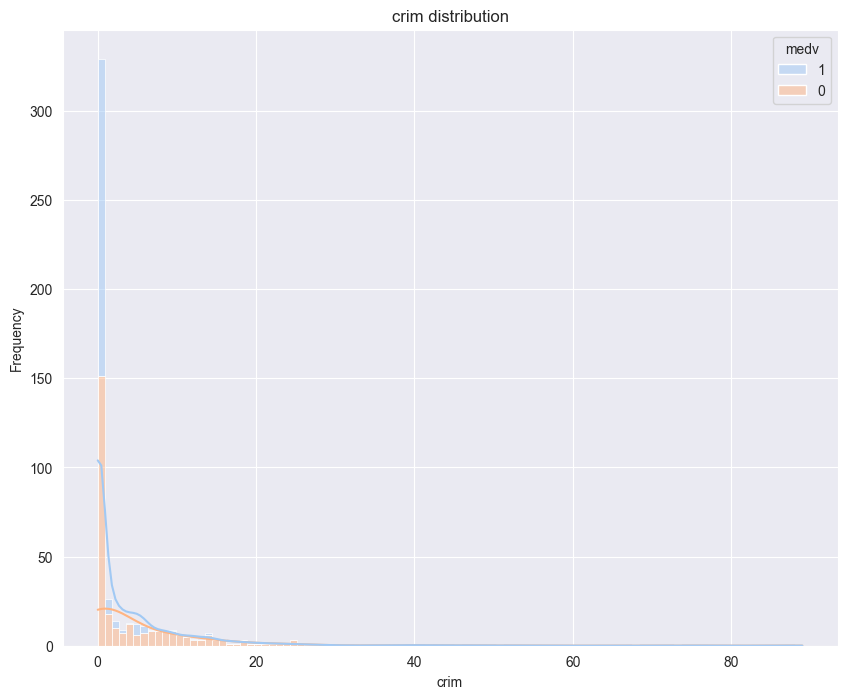

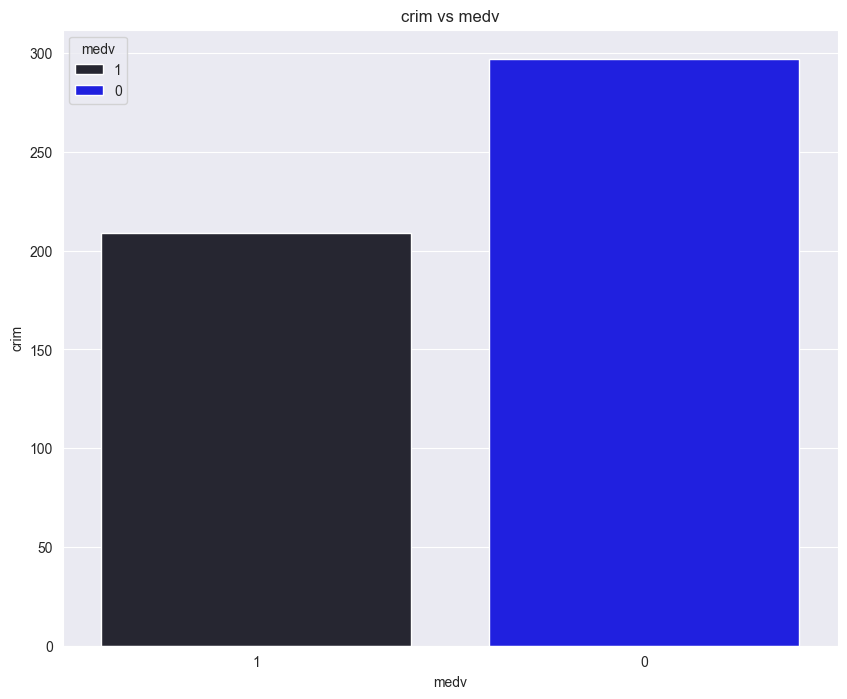

Correlation between crim and medv: -0.2704644902761643




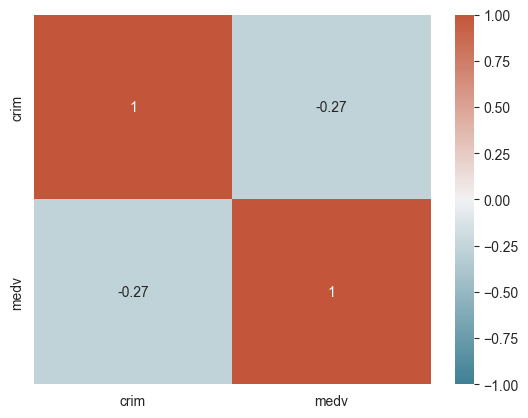

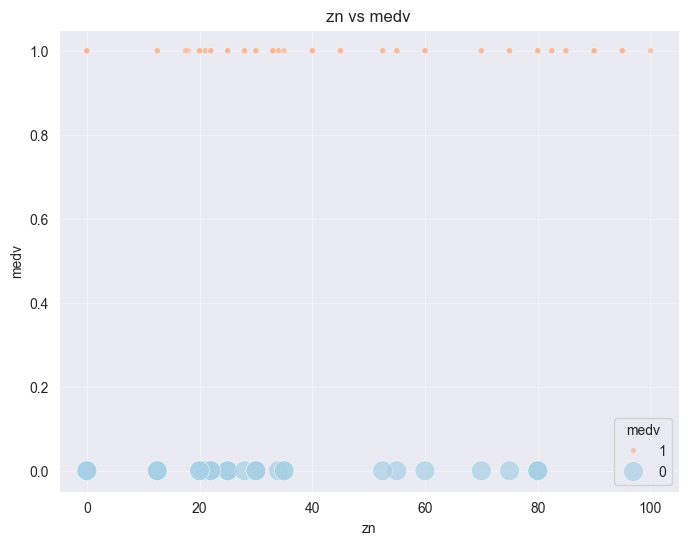

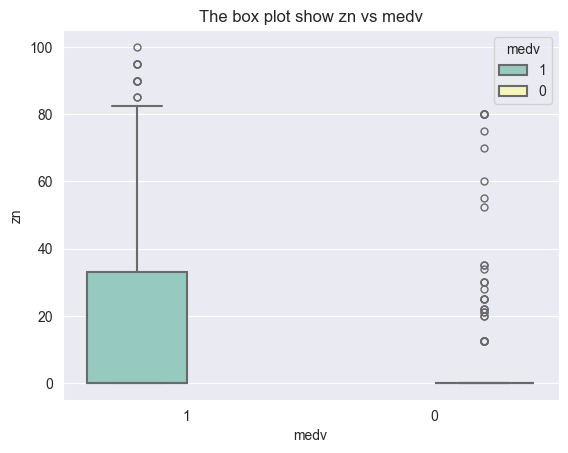

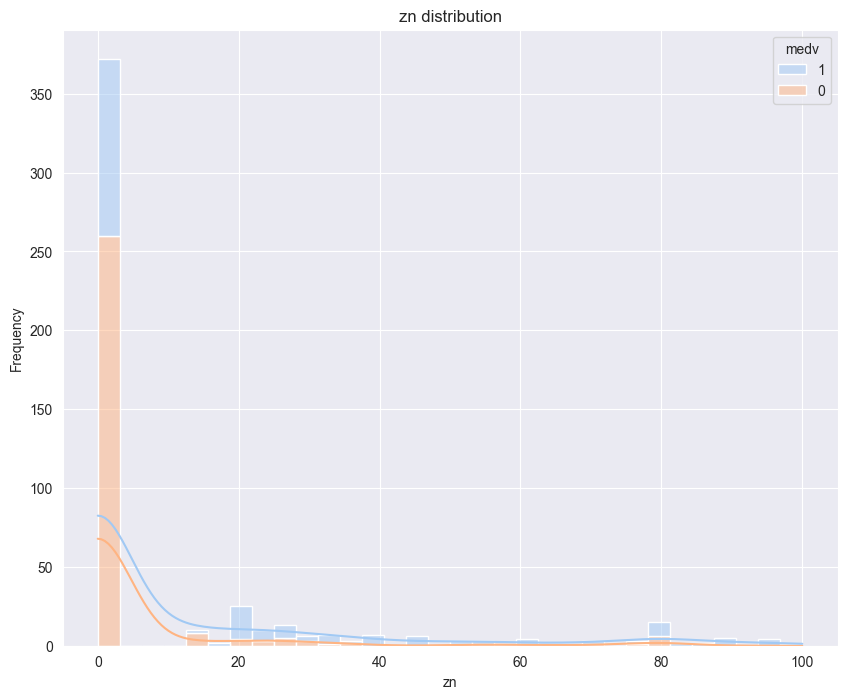

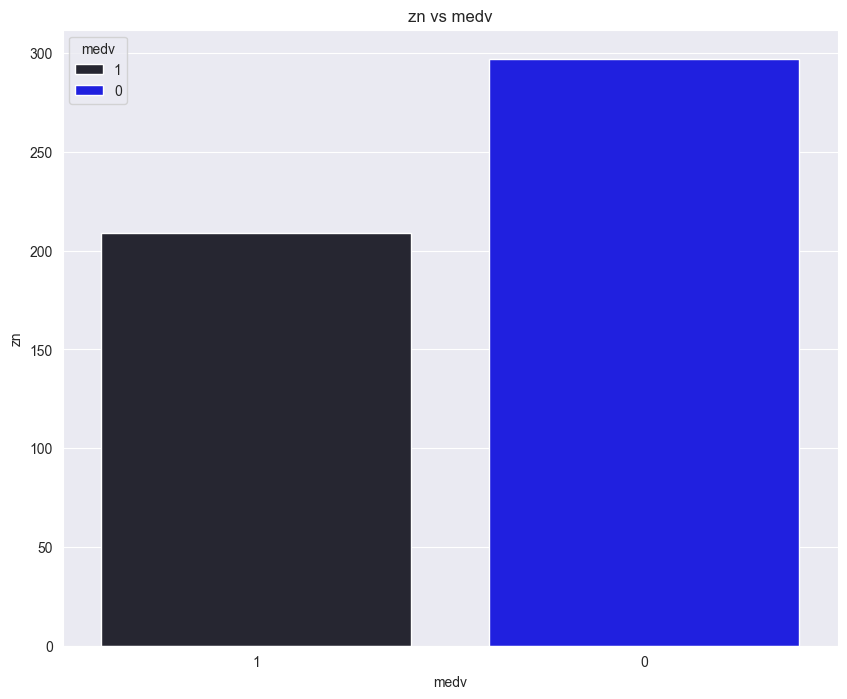

Correlation between zn and medv: 0.3466888419214931




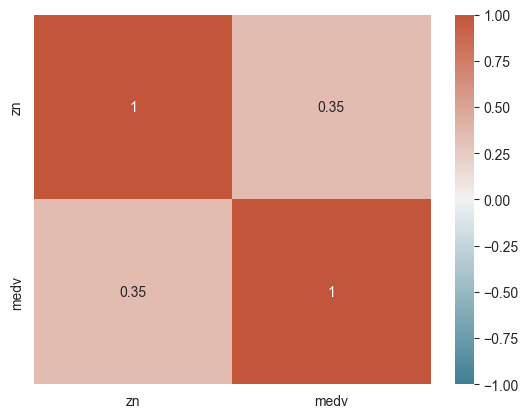

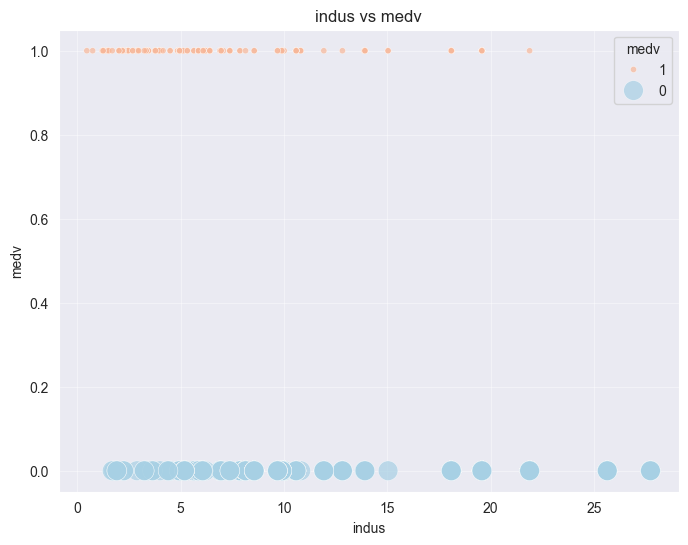

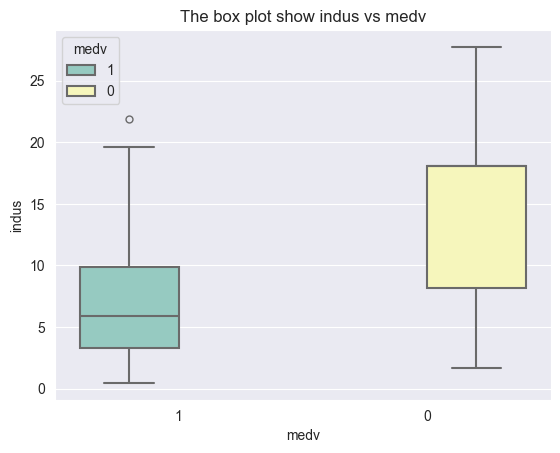

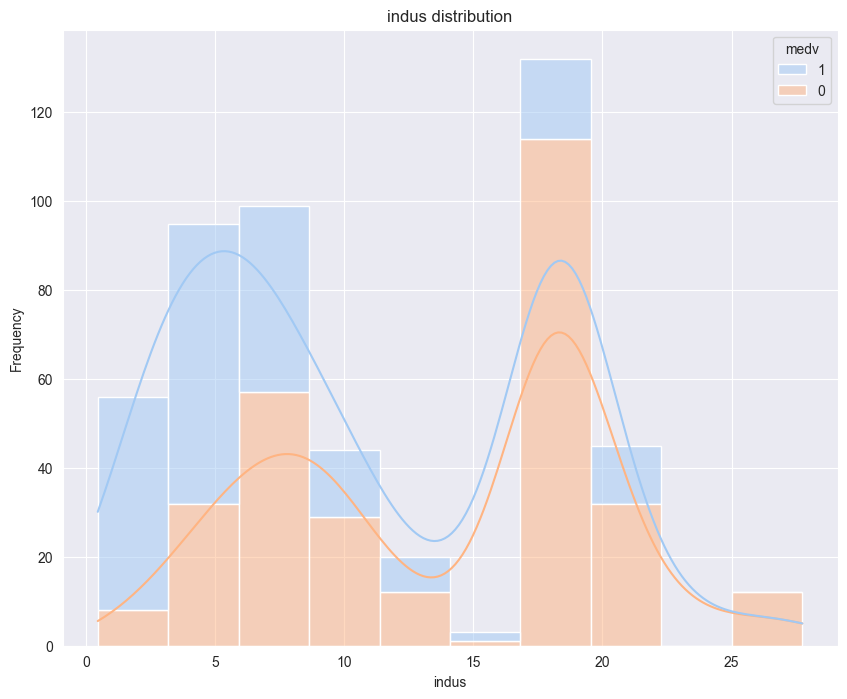

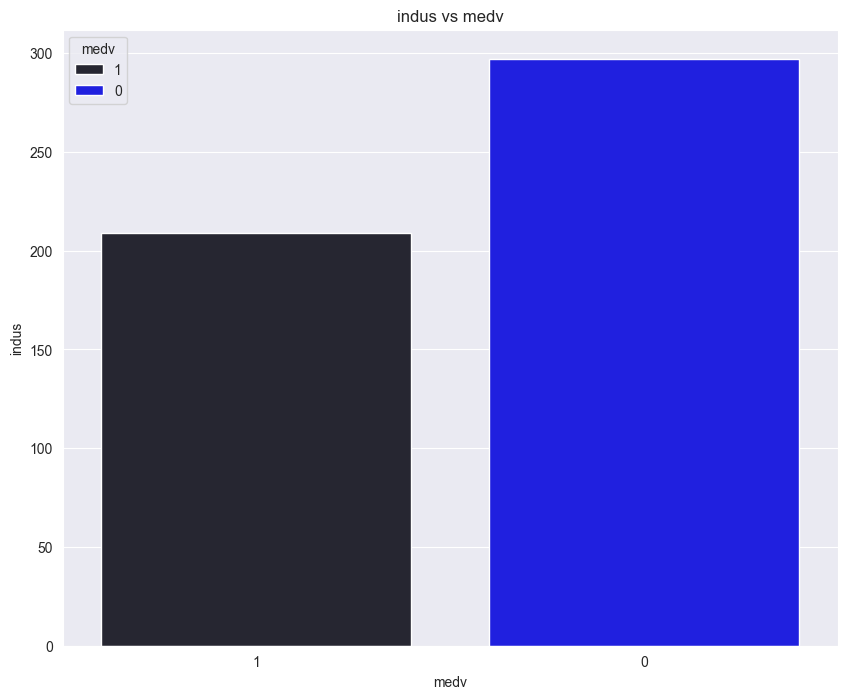

Correlation between indus and medv: -0.4655361222829857




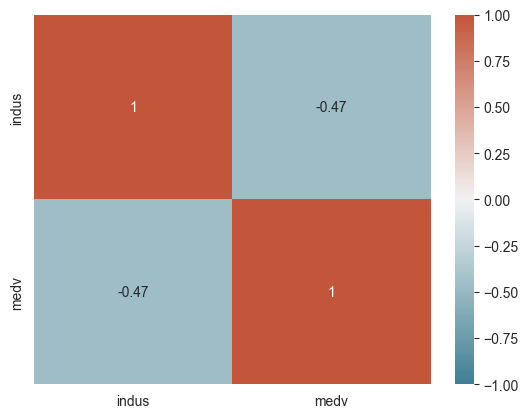

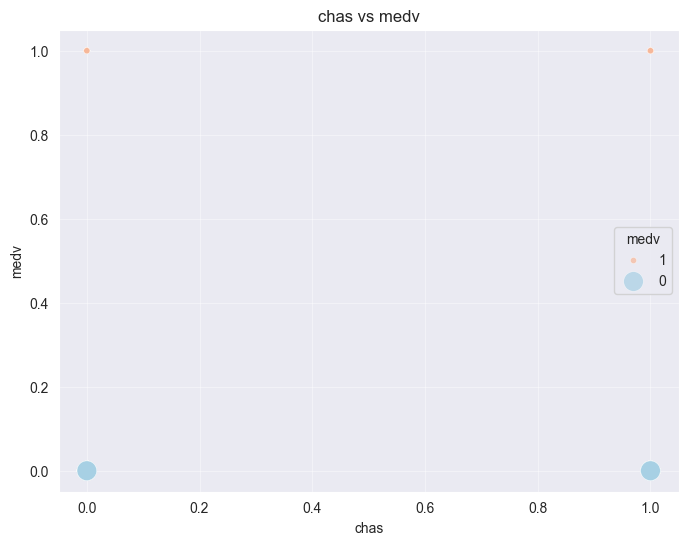

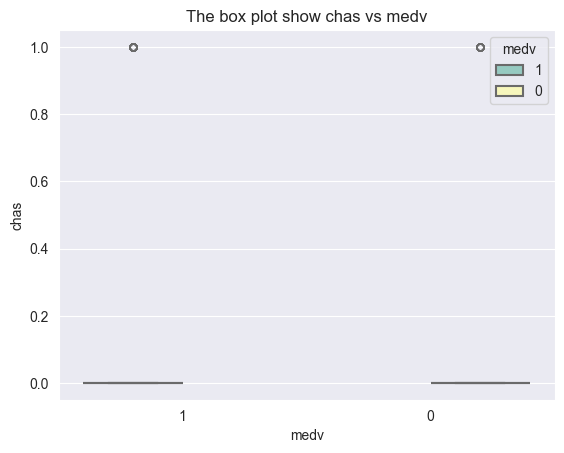

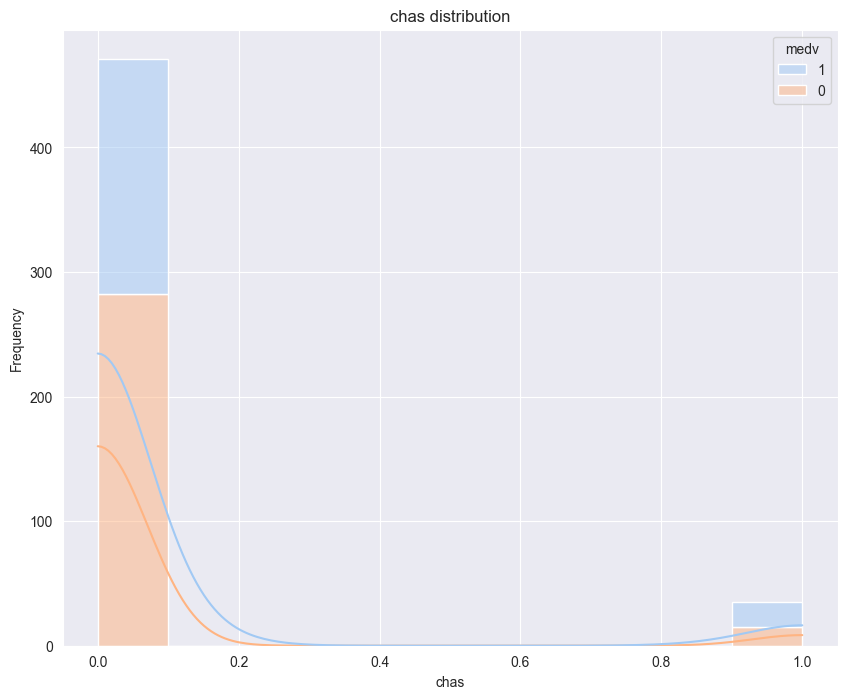

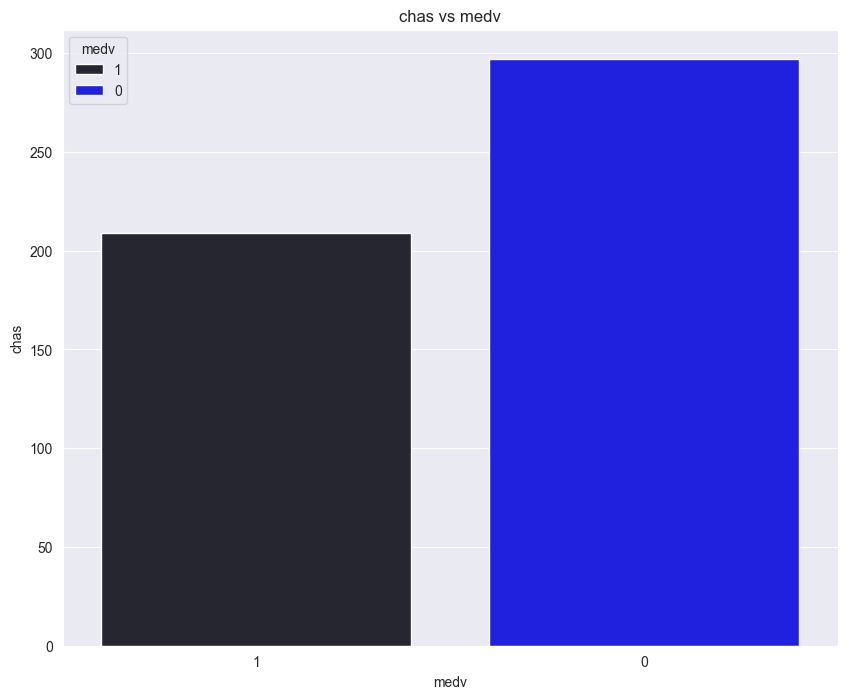

Correlation between chas and medv: 0.0876873654821804




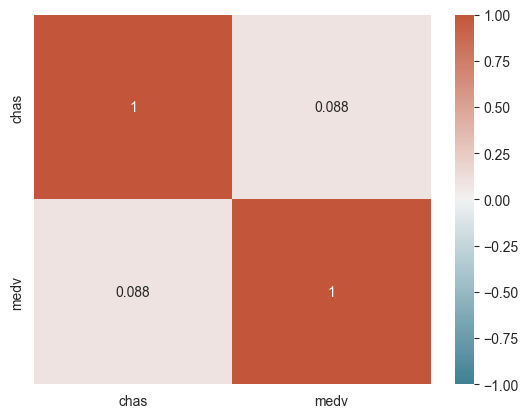

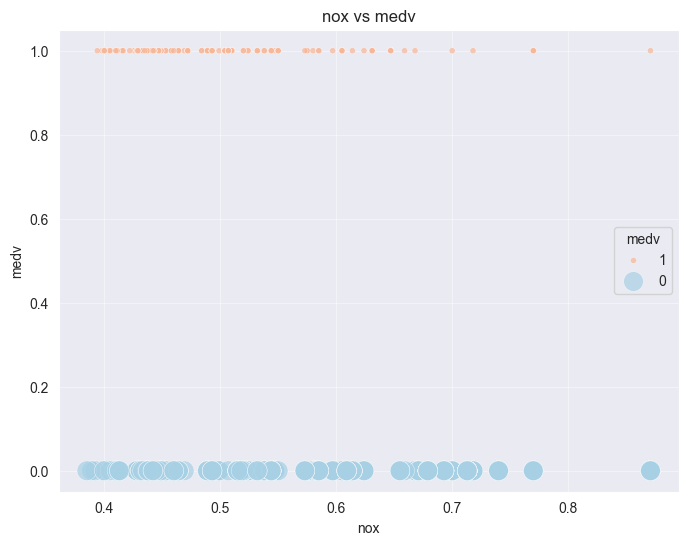

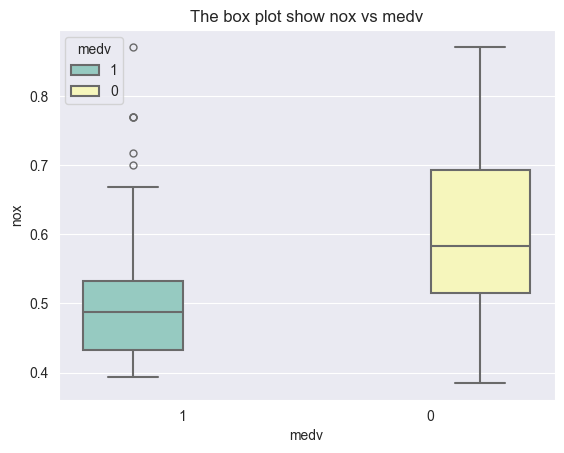

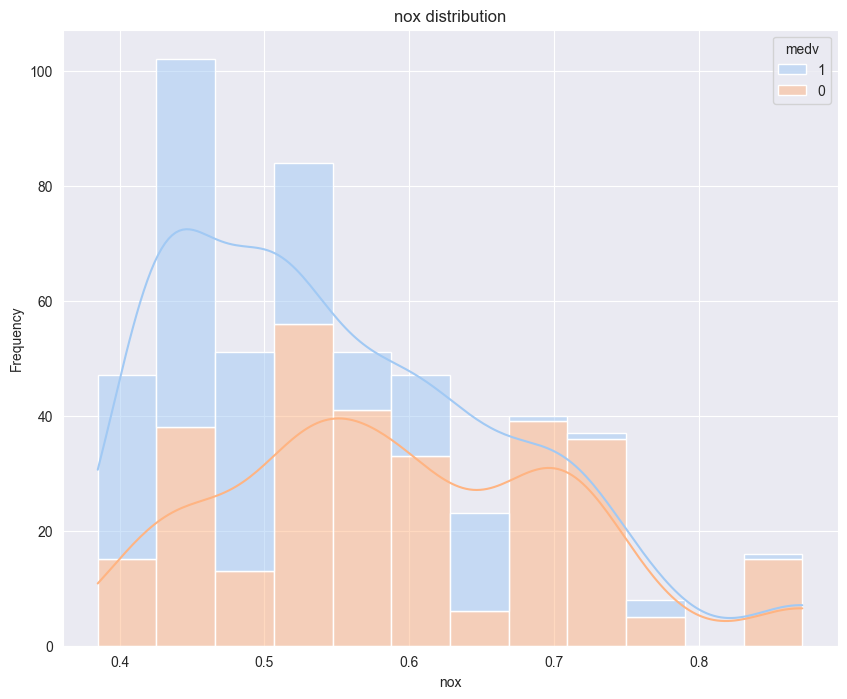

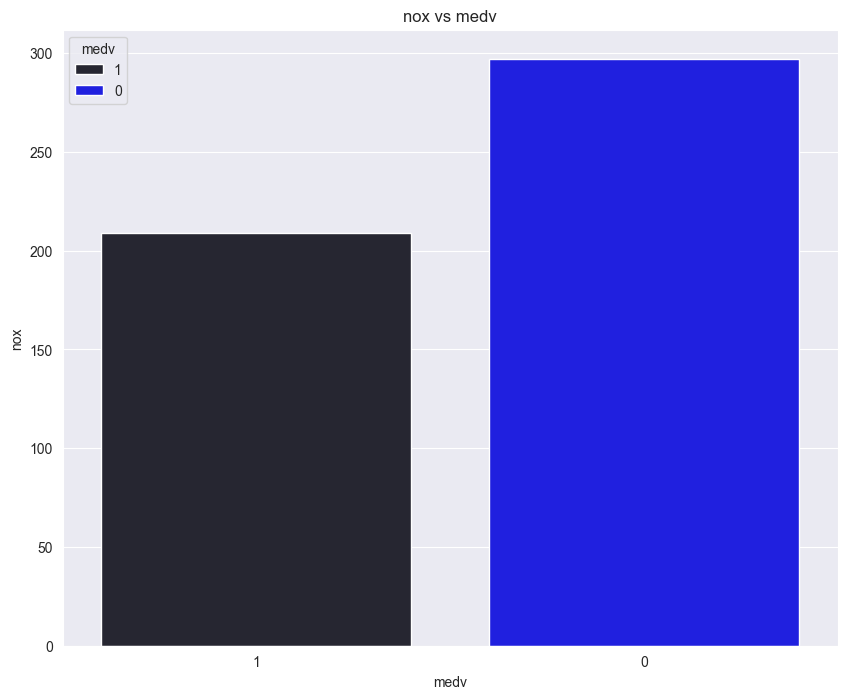

Correlation between nox and medv: -0.40917656958605275




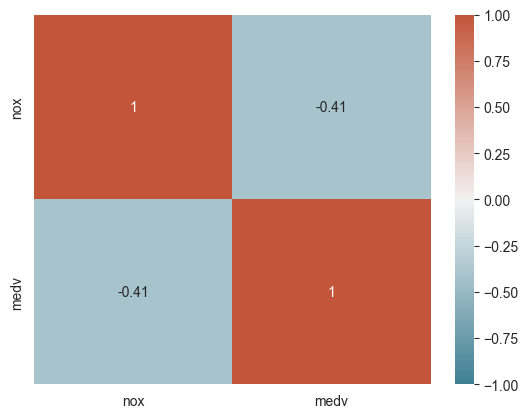

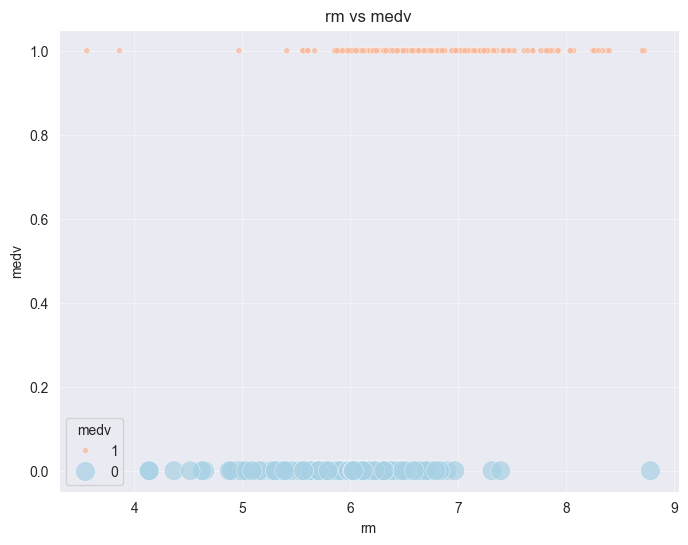

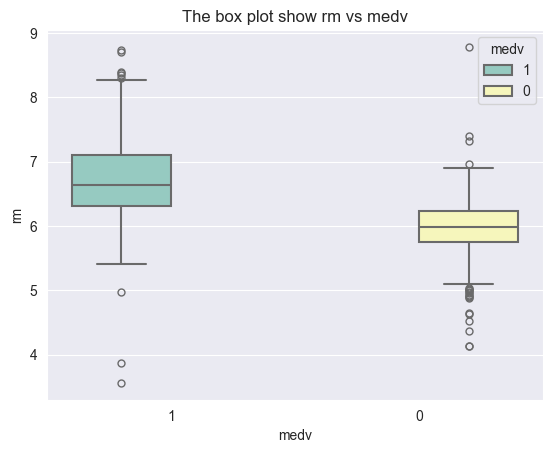

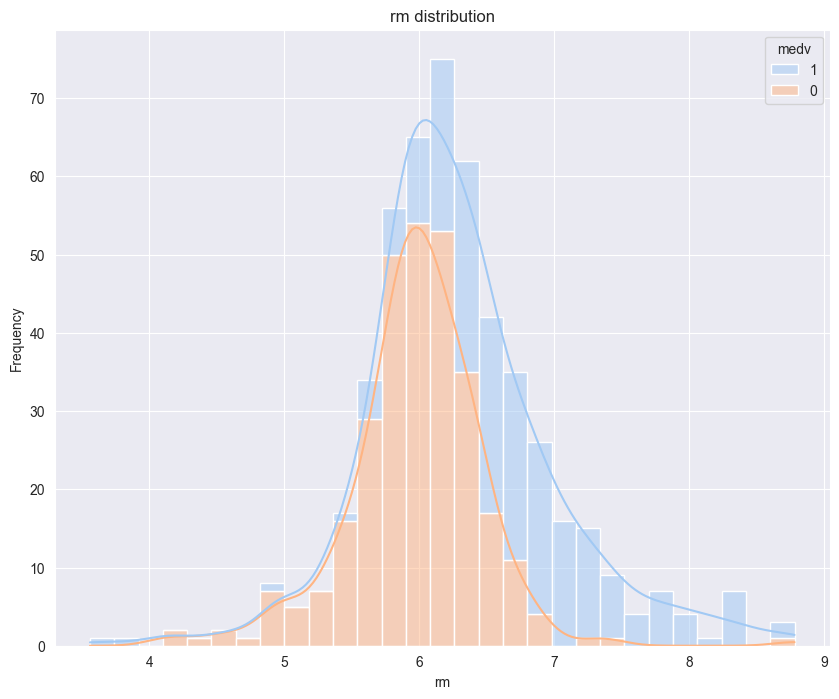

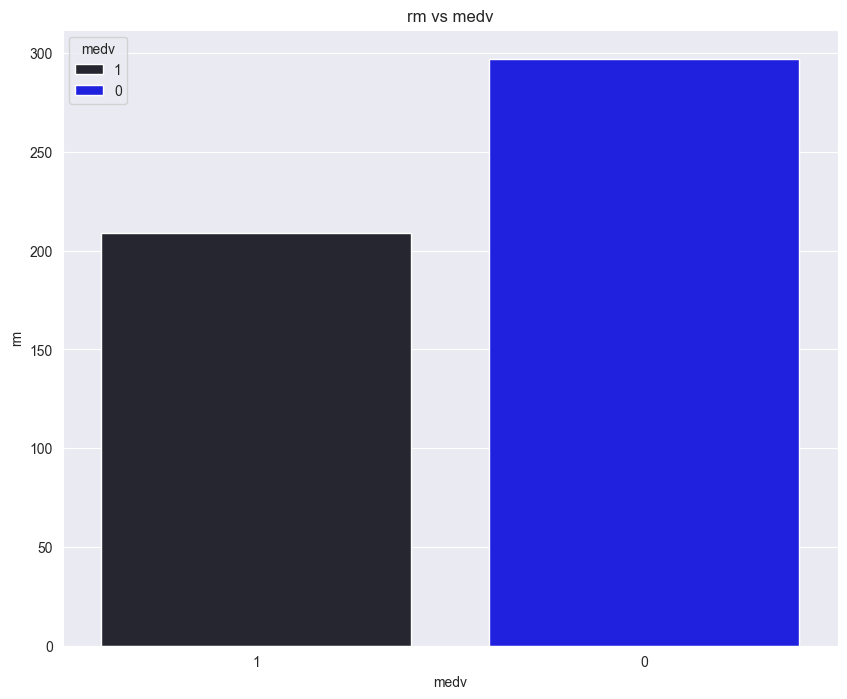

Correlation between rm and medv: 0.5319952438522204




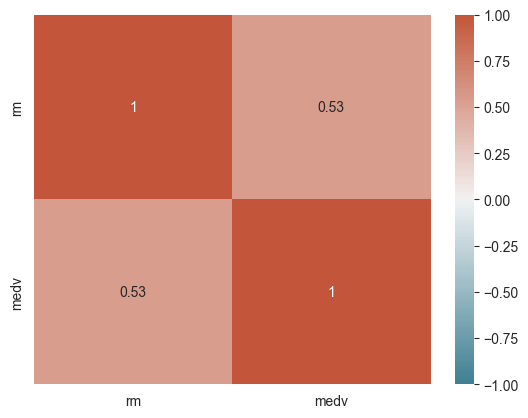

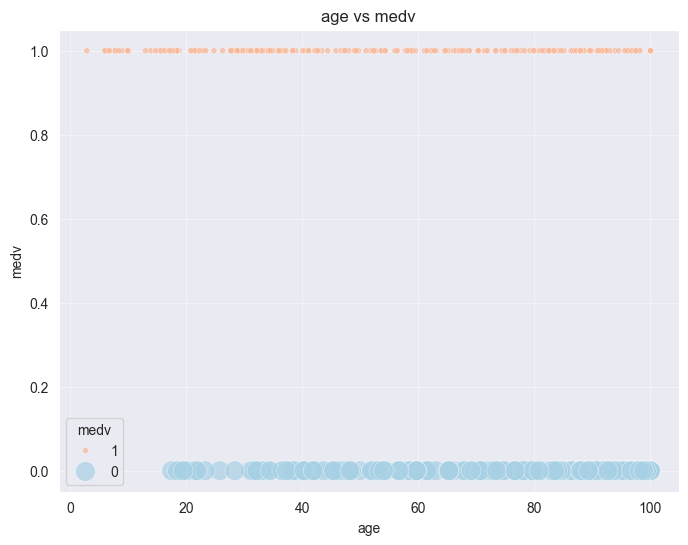

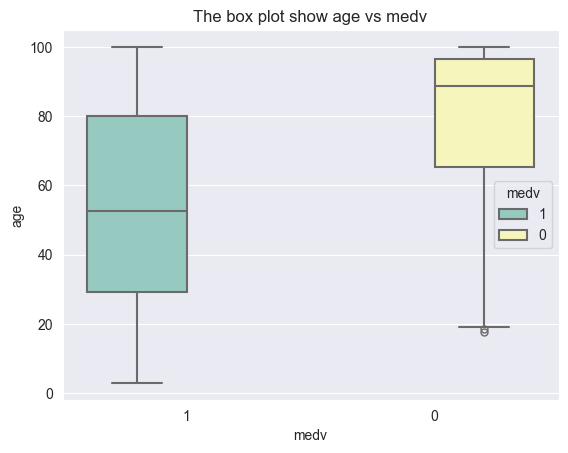

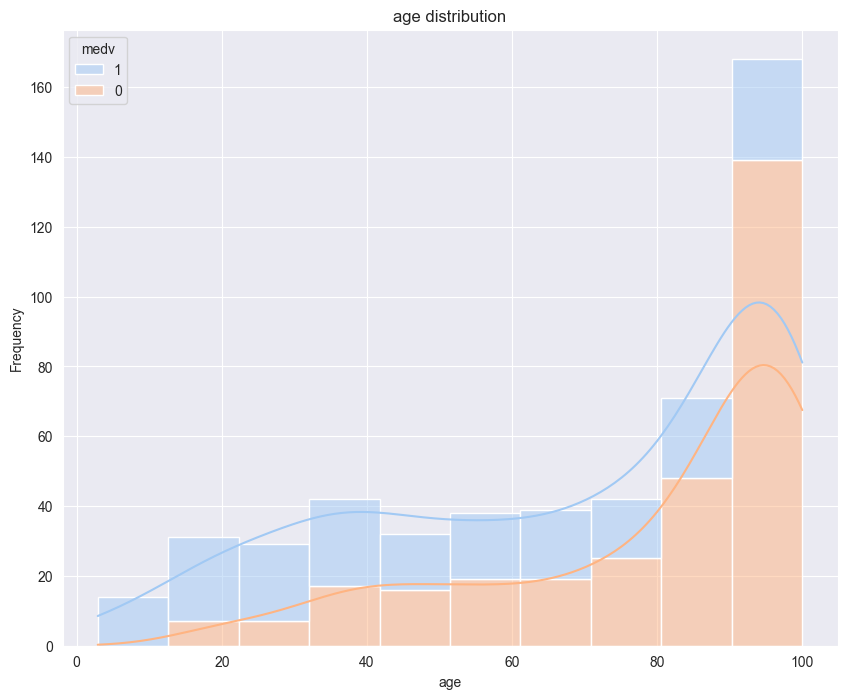

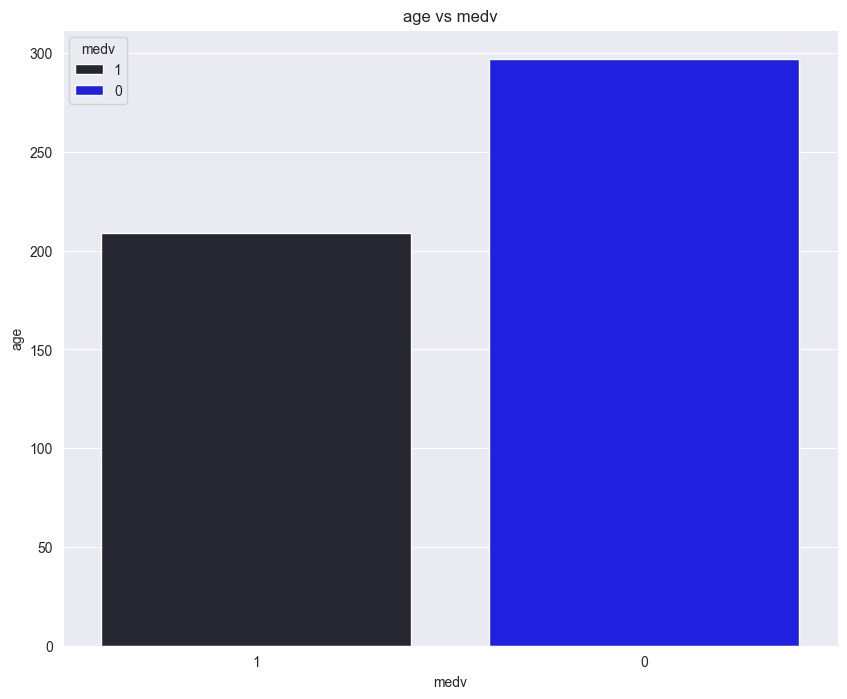

Correlation between age and medv: -0.4423444421280751




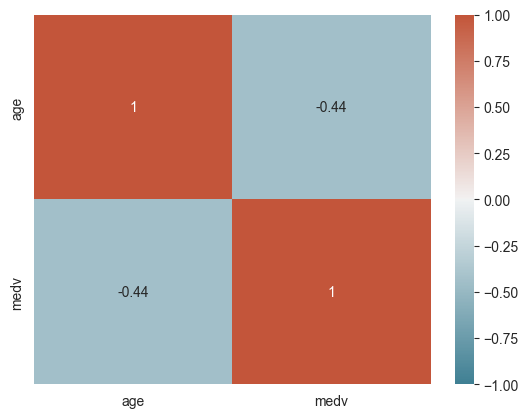

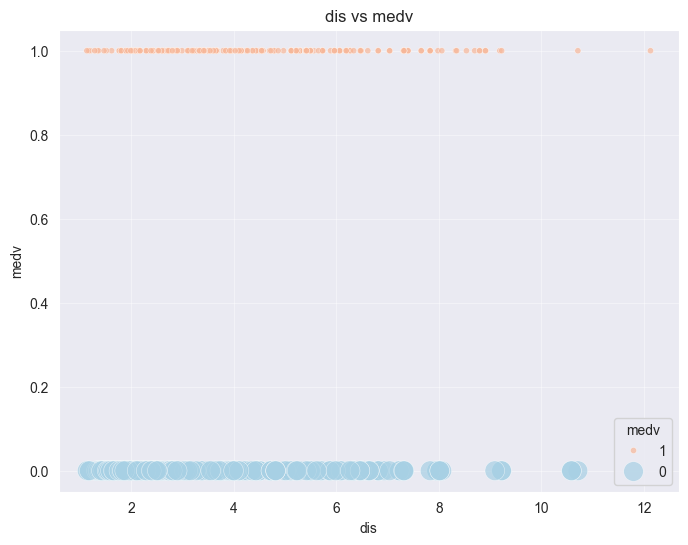

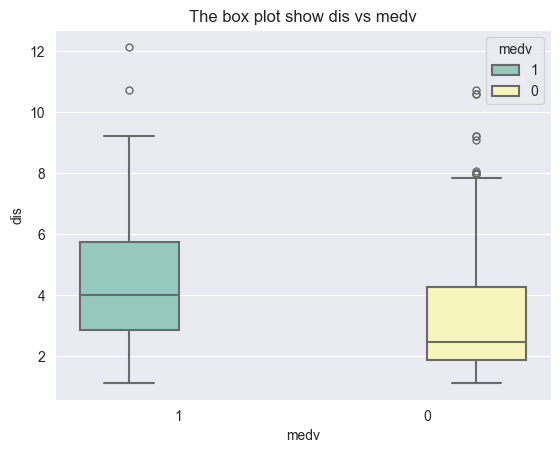

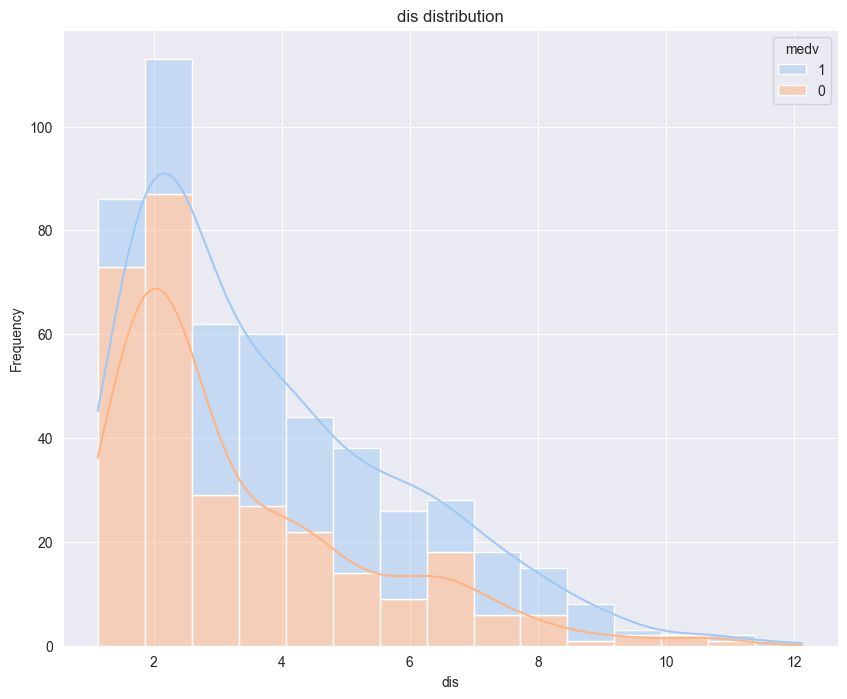

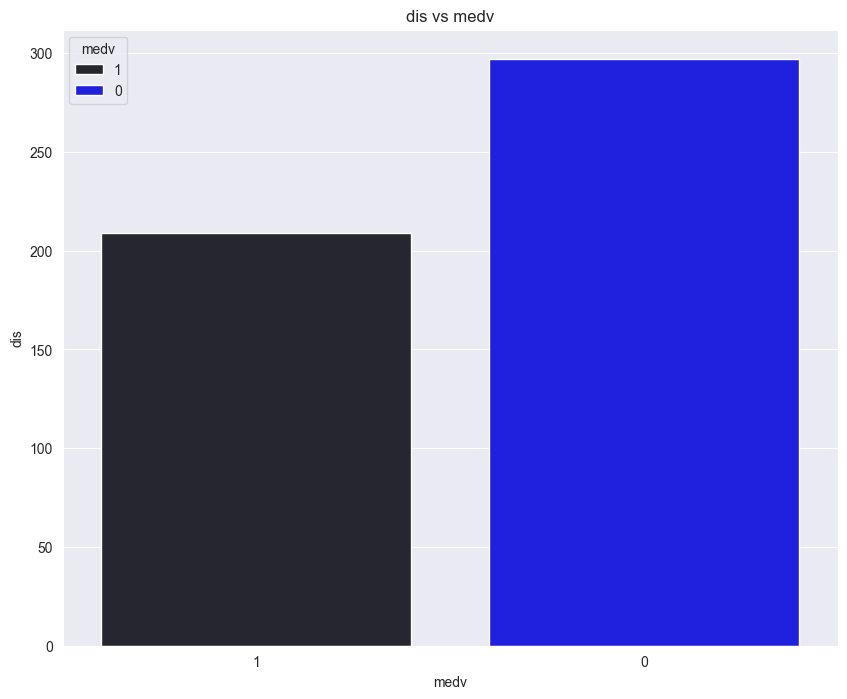

Correlation between dis and medv: 0.27203078590963115




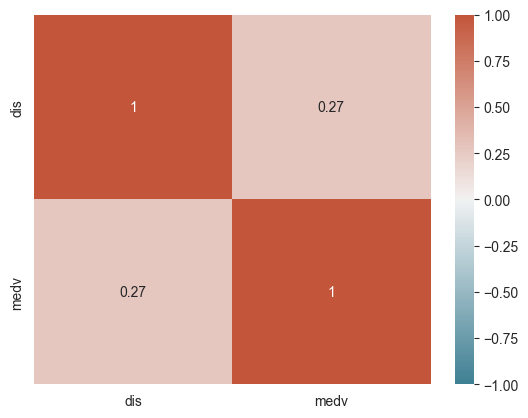

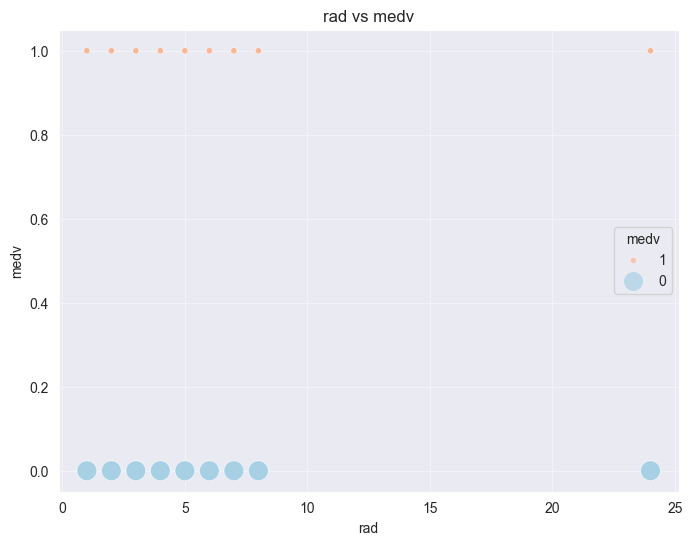

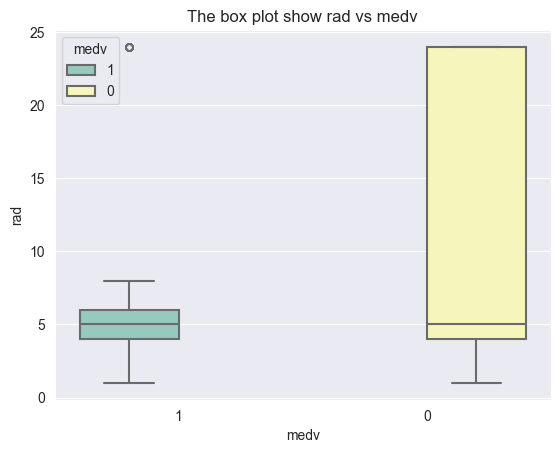

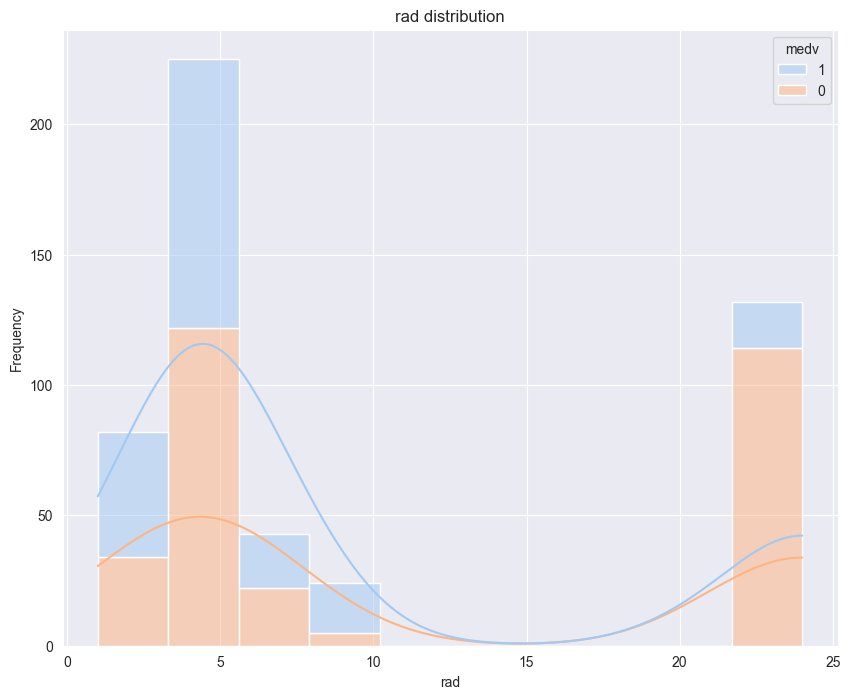

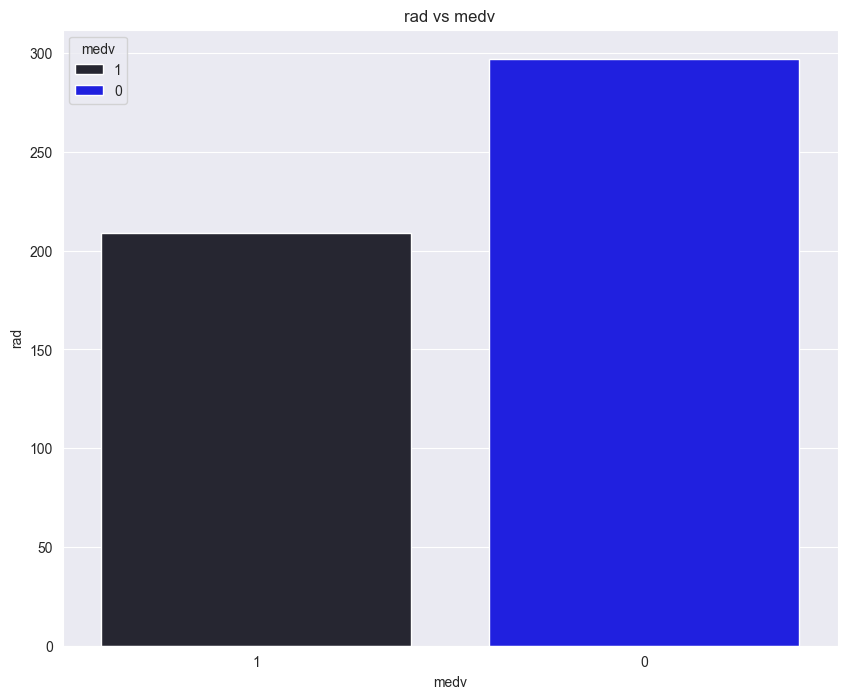

Correlation between rad and medv: -0.3169155154341673




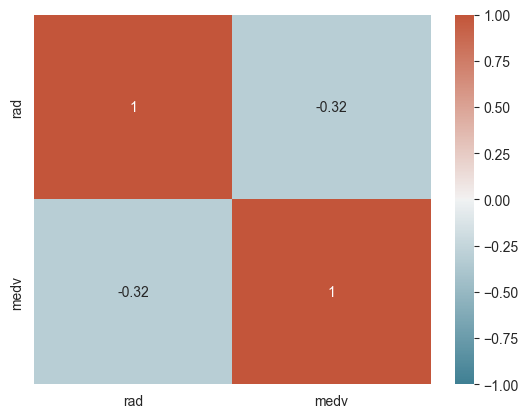

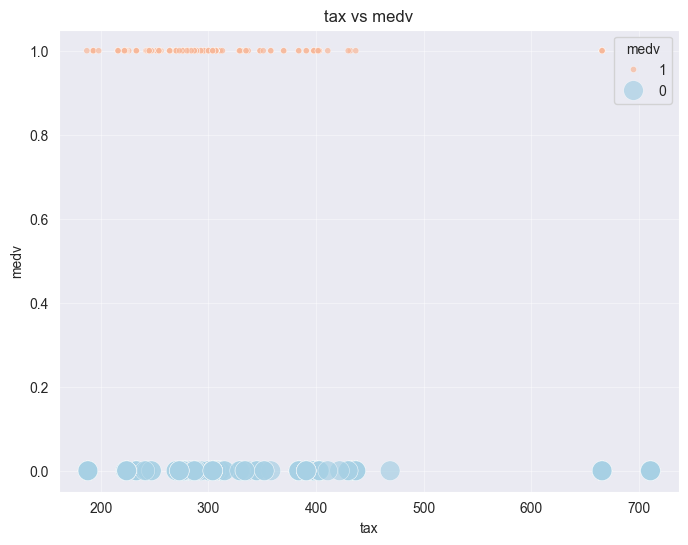

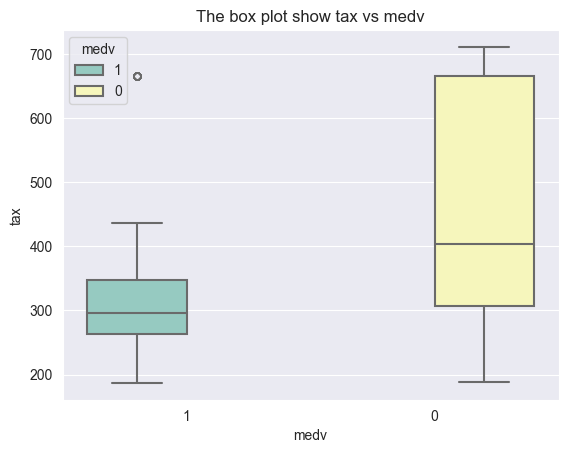

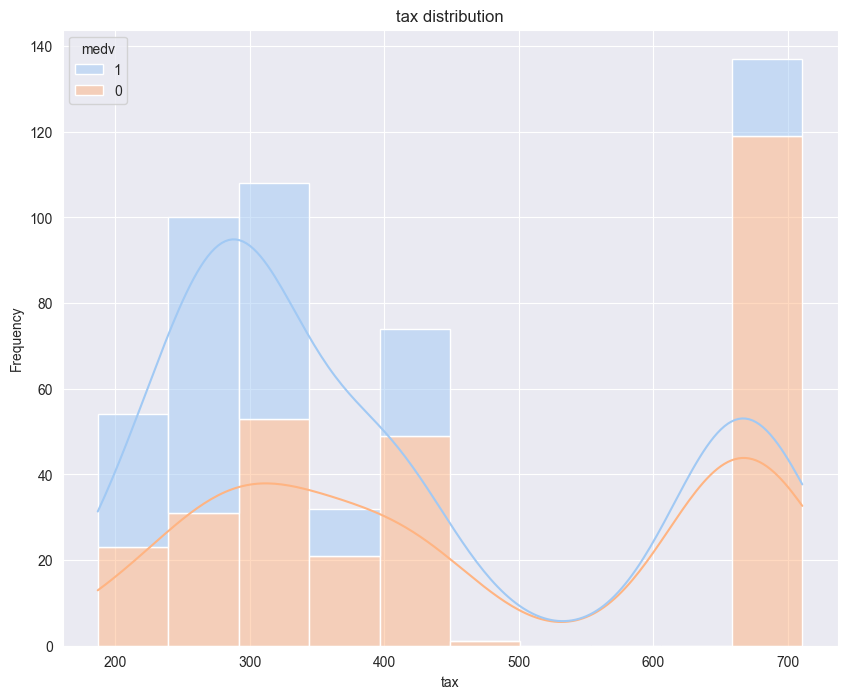

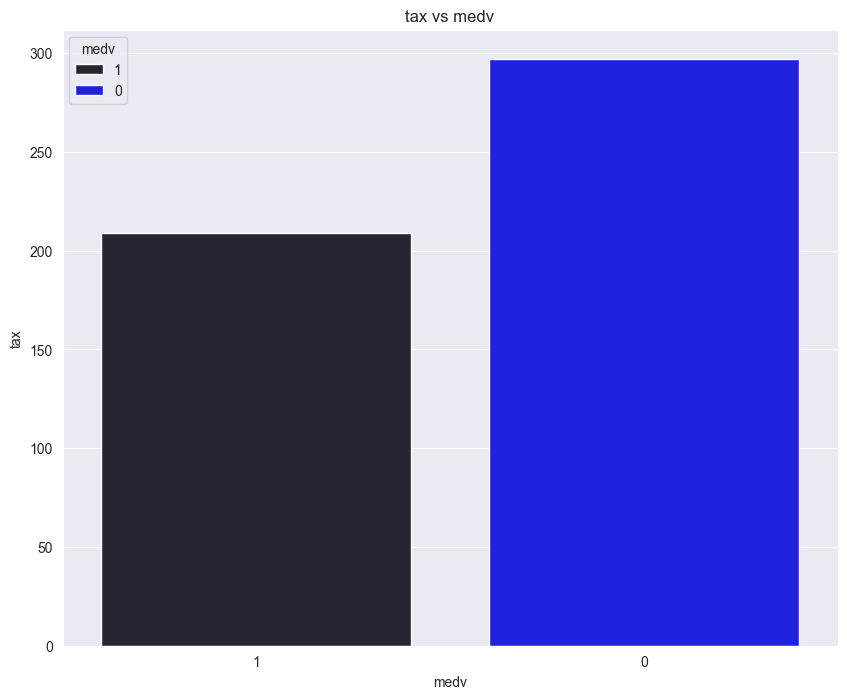

Correlation between tax and medv: -0.40317363828498615




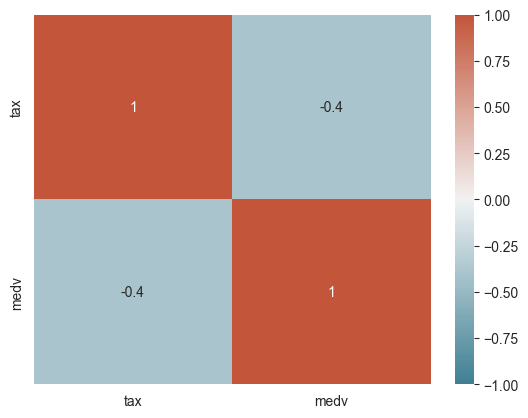

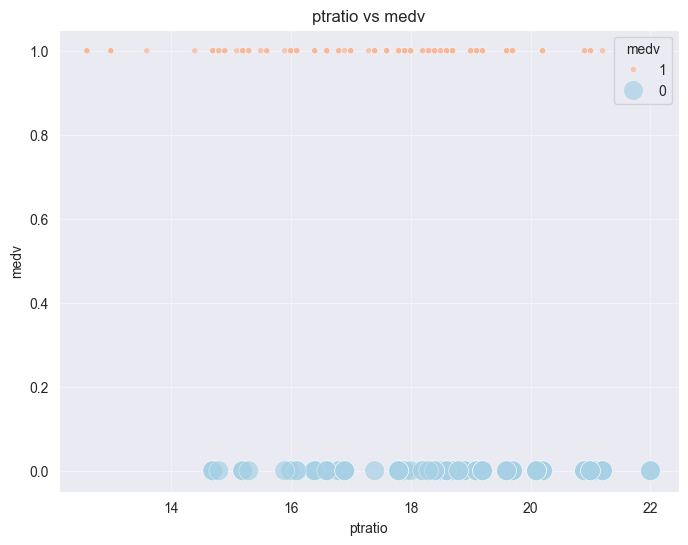

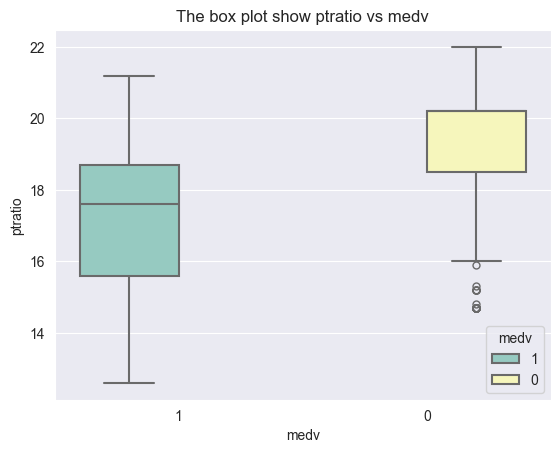

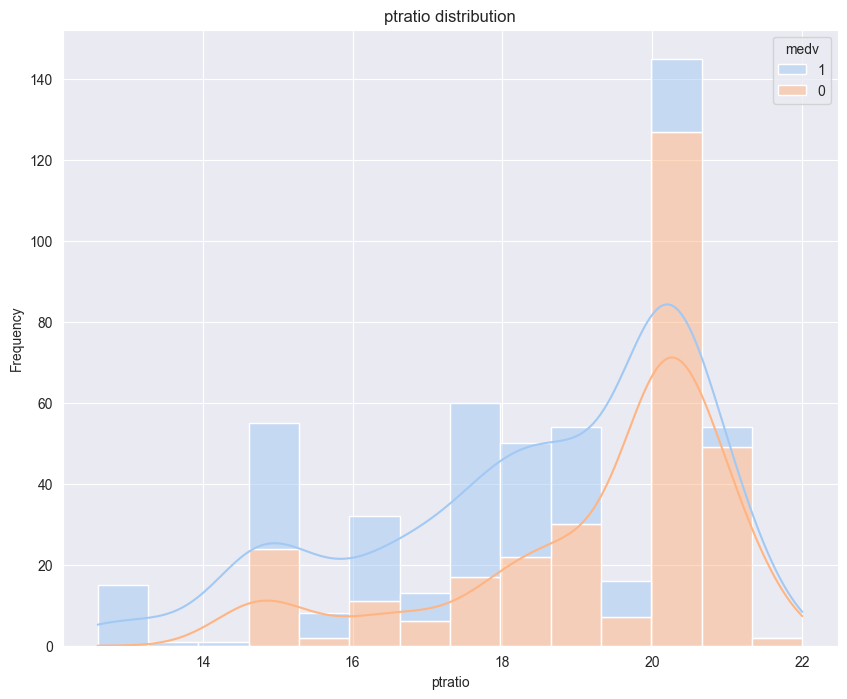

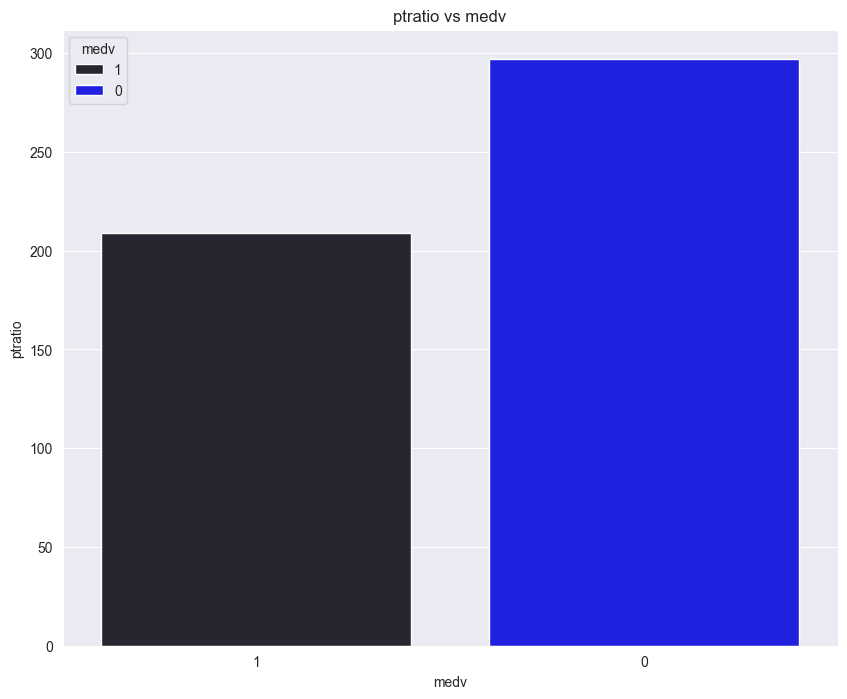

Correlation between ptratio and medv: -0.45078598380321516




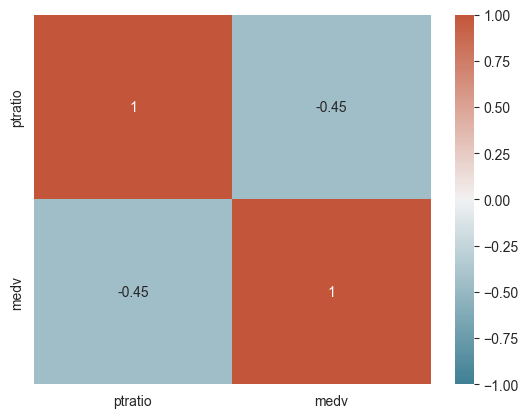

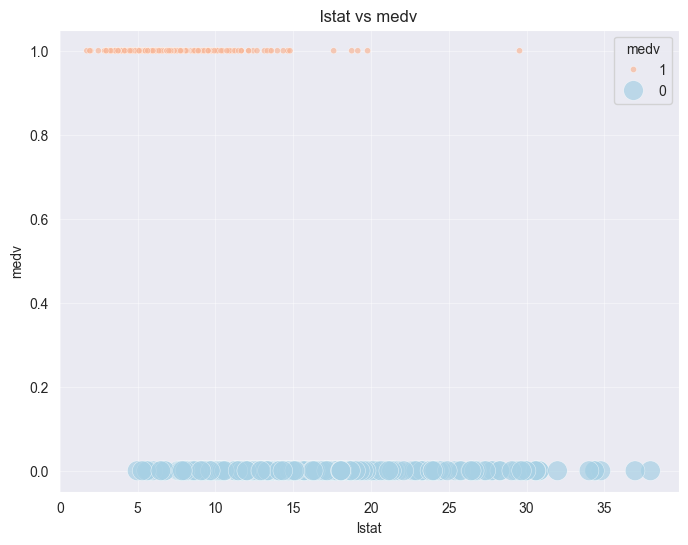

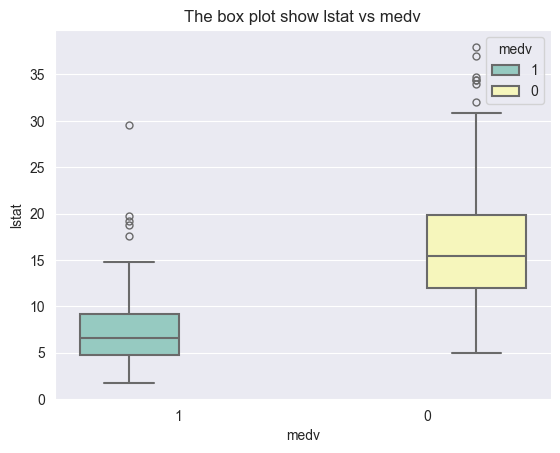

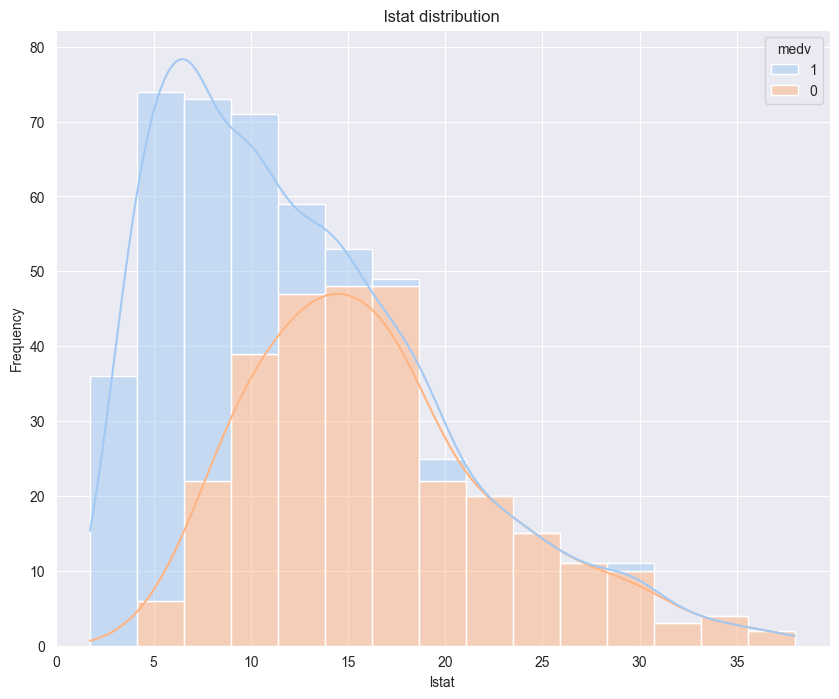

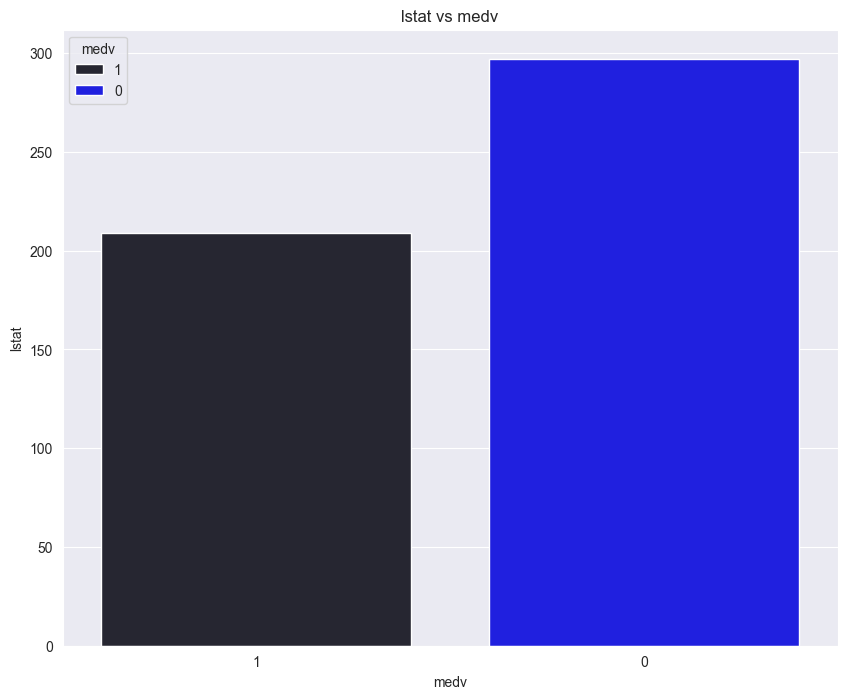

Correlation between lstat and medv: -0.6389961717086851


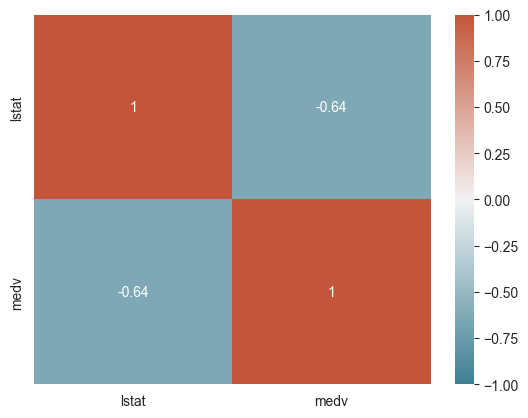

In [4]:
boston_data['medv'].replace(['high', 'low'], [1,0], inplace=True)
print(boston_data.head())
def analyze_colum(data, column, target):
    #scatter plot to visualize the data
    sns.set_palette('deep')
    print("\n")
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data,x=column, y=target,
                    alpha= 0.7,size='medv', hue='medv',hue_order=[1,0], sizes=(20, 200), palette='RdBu')
    plt.grid(True, alpha=0.4)
    plt.title(f"{column} vs {target}")
    plt.xlabel(column)
    plt.ylabel(target)
    plt.show()

    #box plot
    sns.boxplot(data=data,x=target,linewidth=1.5, palette="Set3",fliersize=5, color='skyeblue',
               order=[1,0],y=column,hue=target,dodge=True, hue_order=[1,0])
    plt.title(f"The box plot show {column} vs {target}")
    plt.show()

    #Histogram to visualize the distribution of data
    print("\n")
    plt.figure(figsize=(10,8))
    sns.histplot(data=data,x=column, palette='pastel',hue=target,hue_order=[1,0], multiple='stack', kde=True)
    plt.title(f'{column} distribution')
    plt.xlabel(f"{column}")
    plt.ylabel('Frequency')
    plt.show()

    #Count Plot
    print("\n")
    plt.figure(figsize=(10,8))
    sns.countplot(data=data, x= target, hue='medv',hue_order=[1,0], color='blue', order=[1,0])
    plt.title(f'{column} vs {target}')
    plt.xlabel(f"{target}")
    plt.ylabel(column)
    plt.show()

    #calculate the column between the feature and the target variable
    correlation = data[[column, target]].corr().iloc[1,0]
    print(f"Correlation between {column} and {target}: {correlation}")
    #create heatmap
    correlation_matrix = data[[column, target]].corr()
    color_map = sns.diverging_palette(220, 20, as_cmap=True)
    sns.heatmap(correlation_matrix, annot=True,cbar=True,vmin=-1, vmax=1, cmap=color_map)

def analyze_all_columns(data, target_column):
    "Analyze all columns against the target"
    columns_feature = [col for col in data.columns if col != target_column]
    for column in columns_feature:
        analyze_colum(data, column,target_column)
analyze_all_columns(data=boston_data, target_column = 'medv')






#3 Make medv the response and the rest of the variables the predictors. Split the dataset into 80% training and 20% testing with

In [5]:
x = boston_data.drop(['medv'], axis=1) # drop the medv

#create a response variable
y = boston_data.medv
#split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Display the shape of test data and train
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(404, 12)
(404,)
(102, 12)
(102,)


#04 Train and test a logistic regression.

In [6]:
#add constant on xtest and x_train
lr_x_train = sm.add_constant(x_train)
lr_xtest = sm.add_constant(x_test)
lr_x_train.head()
#create the Logistic Regression Model
lr_model = sm.Logit(y_train, lr_x_train)
#optimize the mode using minimization algorithm
lr_model = lr_model.fit(method='minimize', maxiter=1000)
#checking if the model converged
if lr_model.mle_retvals['converged']:
    print("The model has converged")
else:
    print("The mode doesn't converge")
print(lr_model.summary())
#make prediction
y_hat = lr_model.predict(lr_xtest)
print(f"My y_hat {y_hat}\n")
prediction = [1 if p > 0.5 else 0 for p in y_hat]
print(y_hat[:10])
print(prediction[:10])



Optimization terminated successfully.
         Current function value: 0.304601
         Iterations: 70
         Function evaluations: 75
         Gradient evaluations: 75
The model has converged
                           Logit Regression Results                           
Dep. Variable:                   medv   No. Observations:                  404
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                           12
Date:                Sun, 09 Mar 2025   Pseudo R-squ.:                  0.5534
Time:                        16:22:07   Log-Likelihood:                -123.06
converged:                       True   LL-Null:                       -275.56
Covariance Type:            nonrobust   LLR p-value:                 4.182e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         

#5 compute the ConfusionMatrix and Test accuracy


In [7]:
#checking for Test accuracy
accuracy = accuracy_score(y_test,prediction)
print(f'Accuracy: {accuracy*100:.2f}')
confusionMatrix = confusion_matrix(y_test, prediction)
print(f"ConfusionMatrix is {confusionMatrix}")
print()

Accuracy: 92.16
ConfusionMatrix is [[64  1]
 [ 7 30]]



#6 LDA MODEl

In [8]:
lda_model = LDA().fit(x_train, y_train)
prediction1 = lda_model.predict(x_test)

acc = accuracy_score(y_test, prediction)
print('Accuracy: ', acc*100)

cm = confusion_matrix(y_test, prediction)
print('Confusion Matrix: \n', cm)

Accuracy:  92.15686274509804
Confusion Matrix: 
 [[64  1]
 [ 7 30]]


#7 Using KNN to classify our data

In [9]:
#train the KNN model
knn_model = knn(n_neighbors=1).fit(x_train, y_train)
prediction2 = knn_model.predict(x_test)
acc = accuracy_score(y_test, prediction2)
print(f"The accuracy score is {acc*100:.2f} %")


The accuracy score is 86.27 %


Calculating the Confusion Matrix

In [10]:
confusion_mat = confusion_matrix(y_test, prediction2)
print(f"The confusion matrix: \n", confusion_mat)
print(" ")

The confusion matrix: 
 [[60  5]
 [ 9 28]]
 


#8 Train the data with NAIVE BAYES

In [11]:
naive_model = nb().fit(x_train, y_train)
#making prediction using naive bayes
prediction3 = naive_model.predict(x_test)
#calculating accuracy score
acc_bayes = accuracy_score(y_test, prediction3)
print(f"The accuracy score is {acc_bayes * 100:.2f} %")

The accuracy score is 80.39 %


Confusion Matrix

In [12]:
confusion_matr = confusion_matrix(y_test, prediction3)
print(f"the confusion matrix is {confusion_matr}")
print(" ")

the confusion matrix is [[53 12]
 [ 8 29]]
 
